---

# **Rocket Flight Simulation**

### **Overview**
This notebook presents a simple simulation of a sounding rocket's flight. The simulation is designed to model the key aspects of a rocket's ascent and descent, including the effects of thrust, drag, and gravity. By implementing numerical integration techniques, the code calculates the rocket's altitude, velocity, and acceleration over time.

### **Features**
- **Dynamic Forces**: The simulation accounts for thrust (active during burn time), drag (dependent on altitude, velocity, and air density), and gravity.
- **Data Visualization**: The simulation produces detailed plots showing the altitude, velocity, acceleration, and forces acting on the rocket throughout the flight.
- **Air Density Variation**: Air density decreases exponentially with altitude, modeled using an approximation of the atmospheric scale height.

### **Rocket Parameters**
The rocket parameters used in this simulation, such as mass, drag coefficient, and thrust, are inspired by a sounding rocket I worked on as part of my **B. Tech. rocketry team**. These parameters reflect the realistic characteristics of a sounding rocket designed for high-altitude launches.

### **How It Works**
1. **Initialization**: The rocket's properties (mass, diameter, drag coefficient, thrust, etc.) and environmental constant (gravity) are defined.
2. **Numerical Integration**: Using small time steps, the code iteratively calculates the forces acting on the rocket and updates its position, velocity, and acceleration.
3. **Data Storage**: Key flight metrics are recorded at each time step for later analysis and visualization.
4. **Simulation Termination**: The simulation stops when the rocket returns to the ground (altitude < 0).
--- 

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rocket Model

In [36]:
class SoundingRocket:
    def __init__(self):
        # Rocket Specifications
        self.mass = 30.0  # kg (including fuel)
        self.empty_mass = 21.6  # kg (without fuel)
        self.diameter = 0.15  # meters
        self.drag_coefficient = 0.2 ## CHECK
        self.avg_thrust = 3421.1 # N (average thrust)
        self.burn_time = 2.92  # seconds
        self.target_altitude = 3048  # meters (10k feet)
        
        # Constants
        self.g = 9.81 # Acceleration due to gravity
        self.air_density = 1.225 # Approximate Value
        
        # Initialization of Variable Parameters
        self.altitude = 0.0
        self.velocity = 0.0
        self.acceleration = 0.0
        self.time = 0.0
        
        # Data Storage
        self.altitude_data = []
        self.velocity_data = []
        self.acceleration_data = []
        self.time_data = []
        self.forces = []
        
    def calculate_air_density(self, altitude):
        return 1.225 * np.exp(-altitude/7400)
    
    def drag_force(self):
        area = np.pi * (self.diameter/2)**2
        current_density = self.calculate_air_density(self.altitude)
        drag_magnitude = 0.5 * self.drag_coefficient * current_density * area * self.velocity**2
        return -np.sign(self.velocity) * drag_magnitude 
        ## Negative sign added here because drag opposes motion
        ## Velocity sign convention:
            ## + = Upwards
            ## - = Downwards
    
    def update_params(self,dt):
        # Forces
        if self.time<self.burn_time:
            thrust=self.avg_thrust
            current_mass = self.mass - (self.mass-self.empty_mass)*(self.time/self.burn_time)
        else:
            thrust = 0
            current_mass = self.empty_mass
        drag=self.drag_force()
        force_due_to_gravity= -self.mass*self.g # Negative since gravity always downwards
        total_F= thrust + drag + force_due_to_gravity
        # Acceleration
        self.acceleration = total_F / current_mass
        # Updating velocity and position
        self.velocity += self.acceleration*dt
        self.altitude+= self.velocity*dt
        self.time+=dt
        # Storing all data
        self.altitude_data.append(self.altitude)
        self.velocity_data.append(self.velocity)
        self.acceleration_data.append(self.acceleration)
        self.time_data.append(self.time)
        self.forces.append({
            'thrust': thrust,
            'drag': drag,
            'gravity': force_due_to_gravity,
            'total': total_F
        })
        # If rocket hits ground => STOP
        if self.altitude<0:
            return False
        return True
    
    def simulate(self, dt=0.01, max_time=200):  # Add max_time parameter
        while self.update_params(dt):
            if self.time >= max_time:  # Avoid infinite loop 
                print("Simulation reached max time limit")
                break
    
    def plotting_results(self):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        # Altitude
        ax1.plot(self.time_data, [x/0.3048 for x in self.altitude_data])  # Convert to feet
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Altitude (feet)')
        ax1.grid(True)
        ax1.set_title('Altitude vs Time')        
        # Velocity
        ax2.plot(self.time_data, self.velocity_data)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Velocity (m/s)')
        ax2.grid(True)
        ax2.set_title('Velocity vs Time')
        # Acceleration
        ax3.plot(self.time_data, [a/9.81 for a in self.acceleration_data])  # Convert to G's
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Acceleration (G\'s)')
        ax3.grid(True)
        ax3.set_title('Acceleration vs Time')        
        # Forces
        forces_thrust = [f['thrust'] for f in self.forces]
        forces_drag = [f['drag'] for f in self.forces]
        forces_gravity = [f['gravity'] for f in self.forces]
        forces_total = [f['total'] for f in self.forces]

        ax4.plot(self.time_data, forces_thrust, label='Thrust')
        ax4.plot(self.time_data, forces_drag, label='Drag')
        ax4.plot(self.time_data, forces_gravity, label='Gravity')
        ax4.plot(self.time_data, forces_total, label='Total', linestyle='--')
        ax4.set_xlabel('Time (s)')
        ax4.set_ylabel('Force (N)')
        ax4.grid(True)
        ax4.legend()
        ax4.set_title('Forces vs Time')
        
        plt.tight_layout()
        plt.show()

# Results 

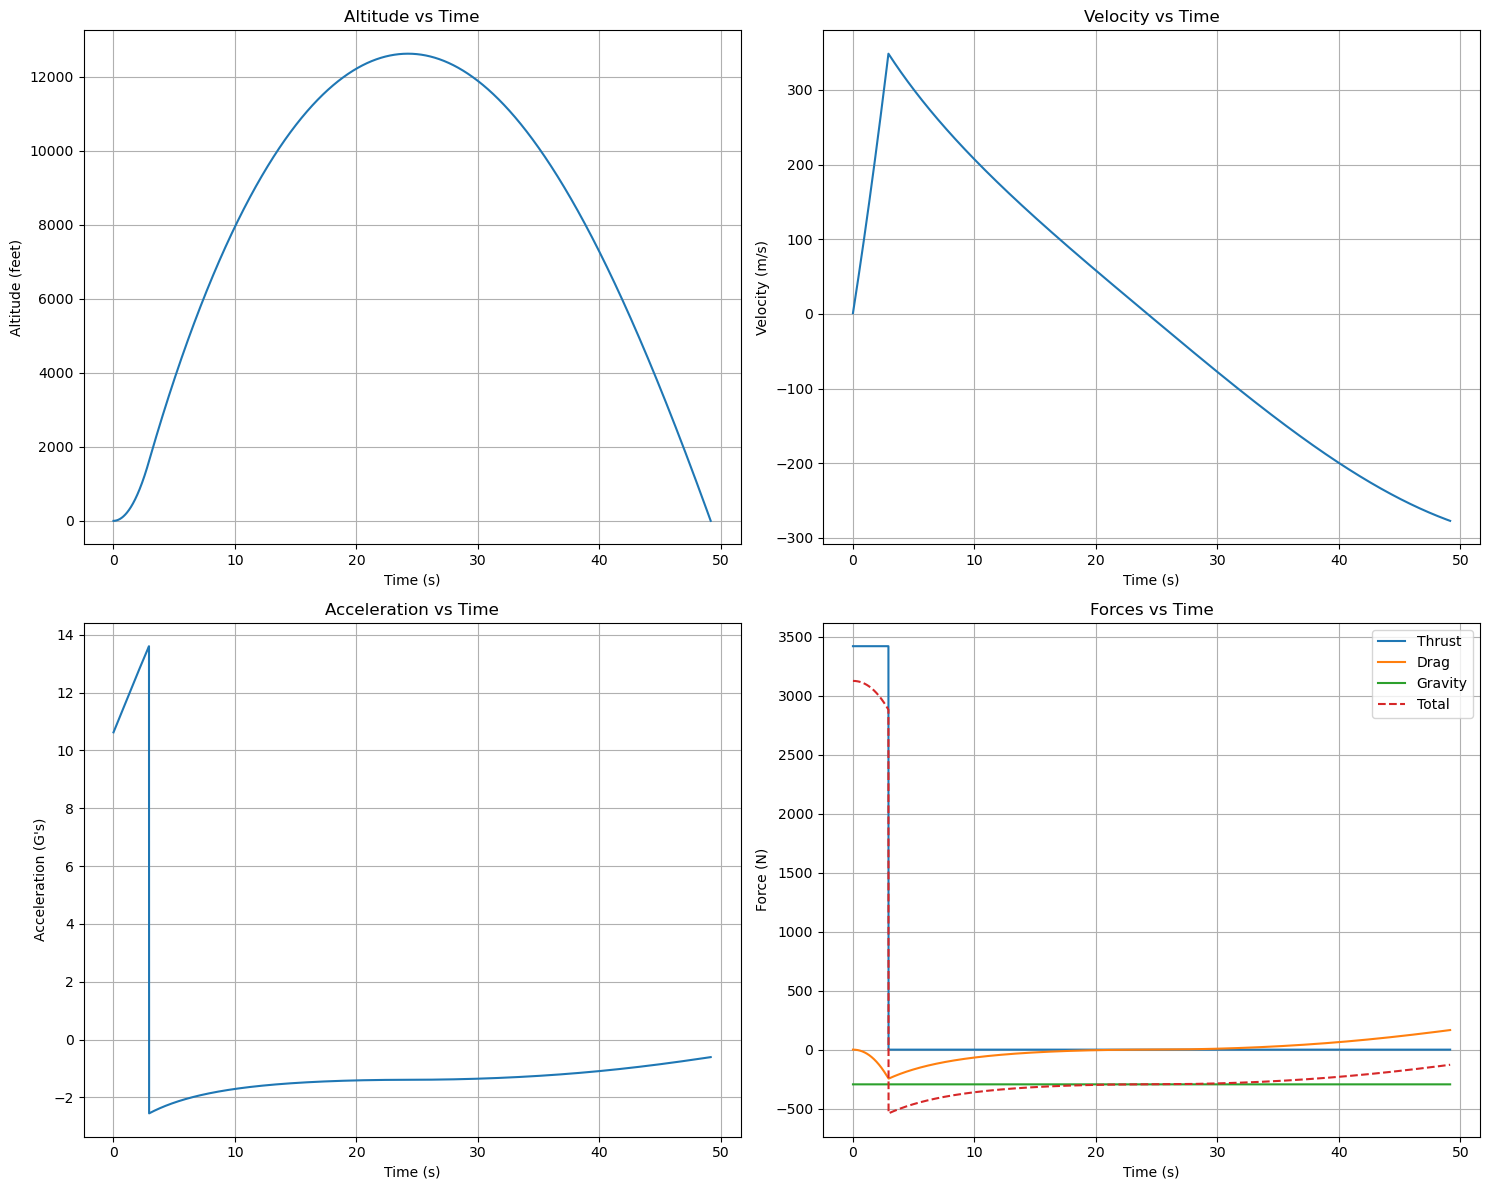

In [37]:
rocket=SoundingRocket()
rocket.simulate()
rocket.plotting_results()